In [1]:
import random

from typing import List, Tuple

import time

# Лабораторная работа 1. Методы сортировки

Вариант: 16

## Блинная сортировка (pancake sorting)

### Классификация алгоритма:

- По типу алгоритма: сортировка переворотом элементов последовательности до какого-либо индекса

- По устойчивости: неустойчивый

- По месту хранения данных: на месте

- По выделению дополнительного пространства: сортировка на месте

- По дополнительным затратам памяти: $O(1)$
   
- Время выполнения: 

  - В худшем случае: $O(n^2)$
  
  - В лучшем случае: $O(n)$
  
  - В среднем: $O(n \times log n)$

### Описание алгоритма:

Блинная сортировка является алгоритмом сортировки, с единственной допустимой операцией — переворотом элементов последовательности до какого-либо индекса. В отличие от традиционных алгоритмов, в которых минимизируют количество сравнений, в блинной сортировке требуется сделать как можно меньше переворотов. Процесс можно визуально представить в виде стопки блинов, которую тасуют путем взятия нескольких блинов сверху и их переворачивания
В этом алгоритме мы итеративно проходим по массиву от конца к началу, на каждой итерации находим максимальный элемент среди первых i элементов и переворачиваем подмассив от начала до максимального элемента, а затем переворачиваем весь подмассив от начала до i-го элемента. Таким образом, на каждой итерации самый большой элемент становится на свое место в конце массива, а на следующей итерации мы сокращаем размер подмассива, который нужно отсортировать.

Данная сортировка считается непрактичной, и непрактичность её состоит в том, что в данном алгоритме вообще не учитывается количество сравнений элементов (считается, что эти операции очень дешевы и быстры), а единственной операцией, имеющей цену, является переворот верхушки стопки сортируемых «блинов». Разумеется, изначально они расположены в произвольном порядке, а желаемым результатом является некое подобие ханойской башни, когда блины большего диаметра лежат снизу, а меньшего располагаются сверху.

### Блок-схема алгоритма

![img](./block_page-0001.jpg)

### Псевдокод алгоритма
```
int index_of_max(float *array, int index){
    int max_index = 0;
    for (int i = 0; i <= index; i++){
        if(array[i] >= array[max_index]){
            max_index = i
        }
    }
    return max_index;
}


void revert(float *array, int index){
    for(int i = 0; i < (index + 1) / 2; i++) {
        float tmp = array[i];
        array[i] = array[index - i];
        array[index - i] = tmp;
    }
}
float *pancake_sort(float *array) {
    for(int i = array.size(); i > 0; i--) {
        max_index = index_of_max(arr, i);
        if(max_index != i && max_index != 0) {
            revert(array, max_index)
        }
        revert(array, i)
    }
    return array
}
```


### Реализация алгоритма

Достоинства алгоритма:
    
    -- простота реализации
    
Недостатки:

    -- низкая эффективность

In [2]:
def index_of_max_wo(arr, index: int) -> int:
    """Функция находит индекс максимального эллемента"""
    max_index: int = 0
    for i in range(0, index + 1):
        if (arr[i] >= arr[max_index]):
            max_index = i
    return max_index

def revert_wo(arr, index: int):
    """Функция переворачивает часть массива от 0 до принимаемого индекса"""
    for i in range(int((index + 1) / 2)):
        tmp = arr[i]
        arr[i] = arr[index - i]
        arr[index - i] = tmp

def pancake_sort_wo(arr):
    # Пробегаемся по массиву, начиная с конца
    for i in range(len(arr) - 1, -1, -1):
        # Находим индекс максимального эллемента
        max_index = index_of_max_wo(arr, i)
        if (max_index != i):
            # Переворачиваем часть массива от 0 до максимального эллементв
            # Таким образом он оказывается в начале
            if (max_index != 0):
                revert_wo(arr, max_index)
            # Теперь переворачиваем весь массив от 0 до i и наш текущий максимум оказывается в конце
            revert_wo(arr, i)
        # В следующий шаг цикла мы уже не будем рассматривать последний эллемент
    return arr

arr = list(random.sample(range(10), 10))
print(arr)
print(pancake_sort_wo(arr))

[2, 7, 9, 0, 8, 4, 3, 6, 5, 1]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


**Второй** вариант реализации, в которой мы переворачиваем массив только один раз за ход

In [3]:
def index_of_max(arr, index: int) -> int:
    """Функция находит индекс максимального эллемента"""
    max_index: int = 0
    for i in range(0, index + 1):
        if (arr[i] >= arr[max_index]):
            max_index = i
    return max_index

def revert_1(arr, max_index: int, index: int):
    """Функция переворачивает часть массива от max до текущего конца"""
    for i in range(max_index, int((index + max_index + 1) / 2)):
        tmp = arr[i]
        arr[i] = arr[index - i + max_index]
        arr[index - i + max_index] = tmp
def pancake_sort_1(arr):
    # Пробегаемся по массиву, начиная с конца
    for i in range(len(arr) - 1, -1, -1):
        # Находим индекс максимального эллемента
        max_index = index_of_max(arr, i)
        if (max_index != i):
            # Переворачиваем часть массива от max элемента до текущего конца
            # Таким образом наш текущий максимум оказывается в конце
            revert_1(arr, max_index, i)
        # В следующий шаг цикла мы уже не будем рассматривать последний эллемент
    return arr

random.sample(range(10), 10)
pancake_sort_1(list(random.sample(range(10), 10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### Визуализация алгоритма

In [4]:
def index_of_max(arr, index: int) -> int:
    """Функция находит индекс максимального эллемента"""
    max_index: int = 0
    for i in range(0, index + 1):
        if (arr[i] >= arr[max_index]):
            max_index = i
    return max_index

def revert(arr, index: int):
    """Функция переворачивает часть массива от 0 до принимаемого индекса"""
    print("Переворачиваем массив от 0-го до ", index, "-го эллемента", sep='')
    arr_str = ""
    for i in range(len(arr)):
        if (i == 0 or i == index):
            arr_str += '['
        arr_str += str(arr[i])
        if (i == 0 or i == index):
            arr_str += ']'
        arr_str += ' '
    print(arr_str)
    i = arr_str.find('[') + 1
    j = arr_str.rfind(']') - 1
    point_str = ' ' * i + '^' + '_' * (j - i - 1) + '^'
    print(point_str)
    for i in range(int((index + 1) / 2)):
        tmp = arr[i]
        arr[i] = arr[index - i]
        arr[index - i] = tmp
    arr_str = ''
    for i in range(len(arr)):
        if (i == 0 or i == index):
            arr_str += '['
        arr_str += str(arr[i])
        if (i == 0 or i == index):
            arr_str += ']'
        arr_str += ' '
    print(arr_str)
def pancake_sort(arr):
    print("Неотсортированный массив: ", arr)
    # Пробегаемся по массиву, начиная с конца
    for i in range(len(arr) - 1, -1, -1):
        # Находим индекс максимального эллемента
        max_index = index_of_max(arr, i)
        if (max_index != i):
            # Переворачиваем часть массива от 0 до максимального эллементв
            # Таким образом он оказывается в начале
            if (max_index != 0):
                revert(arr, max_index)
            # Теперь переворачиваем весь массив от 0 до i и наш текущий максимум оказывается в конце
            revert(arr, i)
        # В следующий шаг цикла мы уже не будем рассматривать последний эллемент
    print("Отсортированный массив: ", arr)

random.sample(range(10), 10)
pancake_sort(list(random.sample(range(10), 10)))

Неотсортированный массив:  [6, 3, 1, 0, 9, 5, 2, 7, 8, 4]
Переворачиваем массив от 0-го до 4-го эллемента
[6] 3 1 0 [9] 5 2 7 8 4 
 ^_________^
[9] 0 1 3 [6] 5 2 7 8 4 
Переворачиваем массив от 0-го до 9-го эллемента
[9] 0 1 3 6 5 2 7 8 [4] 
 ^___________________^
[4] 8 7 2 5 6 3 1 0 [9] 
Переворачиваем массив от 0-го до 1-го эллемента
[4] [8] 7 2 5 6 3 1 0 9 
 ^___^
[8] [4] 7 2 5 6 3 1 0 9 
Переворачиваем массив от 0-го до 8-го эллемента
[8] 4 7 2 5 6 3 1 [0] 9 
 ^_________________^
[0] 1 3 6 5 2 7 4 [8] 9 
Переворачиваем массив от 0-го до 6-го эллемента
[0] 1 3 6 5 2 [7] 4 8 9 
 ^_____________^
[7] 2 5 6 3 1 [0] 4 8 9 
Переворачиваем массив от 0-го до 7-го эллемента
[7] 2 5 6 3 1 0 [4] 8 9 
 ^_______________^
[4] 0 1 3 6 5 2 [7] 8 9 
Переворачиваем массив от 0-го до 4-го эллемента
[4] 0 1 3 [6] 5 2 7 8 9 
 ^_________^
[6] 3 1 0 [4] 5 2 7 8 9 
Переворачиваем массив от 0-го до 6-го эллемента
[6] 3 1 0 4 5 [2] 7 8 9 
 ^_____________^
[2] 5 4 0 1 3 [6] 7 8 9 
Переворачиваем массив от 0-г

In [5]:
### Тестирование программы

sortmethod = pancake_sort_wo

assert sortmethod([1, 2, 3, 4]) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного массива'

assert sortmethod([4, 3, 2, 1]) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного в обратном порядке массива'

assert sortmethod([1, 3, 4, 2]) == [1, 2, 3, 4], 'Ошибка при сортировки произвольного массива'

assert sortmethod([1, 3, 1, 2]) == [1, 1, 2, 3], 'Ошибка при сортировки массива с повторящимися элементами'


In [6]:
# Набор данных для тестирования алгоритма

def get_sort_array(n:int)->List:
    '''Возвращает отсортированный массив'''
    return list(range(n))

def get_reverse_array(n:int)->List:
    '''Возвращает отсортированный в обратном порядке массив'''
    return list(range(n))[::-1]

def get_random_array(n:int)->List:
    '''Возвращает перемешанный массив'''
    return list(random.sample(range(n), n))


### Литература

Алгоритмы сортировки данных (Основные понятие алгоритмов сортировки). URL:https://www.evkova.org/kursovye-raboty/algoritmyi-sortirovki-dannyih-osnovnyie-ponyatie-algoritmov-sortirovki

Описание алгоритма блинной сортировк. URL: https://programm.top/c-sharp/algorithm/array-sort/pancake-sort/

Ссылка на вики с описанием блинной сортировки. URL: https://neerc.ifmo.ru/wiki/index.php?title=Блинная_сортировка

Ссылка на википедию. URL: https://ru.wikipedia.org/wiki/Блинная_сортировка

Ссылка на статью в Habr по сортировкам выбором. URL: https://habr.com/ru/post/422085/

### Создаём сортируемые массивы

In [7]:
# Массивы для хранения результат замеров времени
times_sort = {}
times_reverse = {}
times_random = {}

### Массивы из 1000 элементов

In [8]:
times_sort.clear()
times_reverse.clear()
times_random.clear()
n = 1000
start = time.time()

sortmethod(list(get_sort_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_sort[n] = t
print(t, "ms")

22.03 ms


In [9]:
n=1000
start = time.time()

sortmethod(list(get_reverse_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_reverse[n] = t
print(t, "ms")

21.48 ms


In [10]:
n = 1000
start = time.time()

sortmethod(list(get_random_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_random[n] = t
print(t, "ms")

51.2 ms


### Массивы из 5000 элементов

In [11]:
n = 5000
start = time.time()

sortmethod(list(get_sort_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_sort[n] = t
print(t, "ms")

558.03 ms


In [12]:
n = 5000
start = time.time()

sortmethod(list(get_reverse_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_reverse[n] = t
print(t, "ms")

559.18 ms


In [13]:
n = 5000
start = time.time()

sortmethod(list(get_random_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_random[n] = t
print(t, "ms")

1357.32 ms


### Массивы из 10000 элементов

In [14]:
n = 10000
start = time.time()

sortmethod(list(get_sort_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_sort[n] = t
print(t, "ms")

2262.97 ms


In [15]:
n = 10000
start = time.time()

sortmethod(list(get_reverse_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_reverse[n] = t
print(t, "ms")

2283.76 ms


In [16]:
n = 10000
start = time.time()

sortmethod(list(get_random_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_random[n] = t
print(t, "ms")

5558.59 ms


### Массивы из 25000 элементов

In [17]:
n = 25000
start = time.time()

sortmethod(list(get_sort_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_sort[n] = t
print(t, "ms")

13893.34 ms


In [18]:
n = 25000
start = time.time()

sortmethod(list(get_reverse_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_reverse[n] = t
print(t, "ms")

14132.33 ms


In [19]:
n = 25000
start = time.time()

sortmethod(list(get_random_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_random[n] = t
print(t, "ms")

35255.77 ms


### Графики зависимости

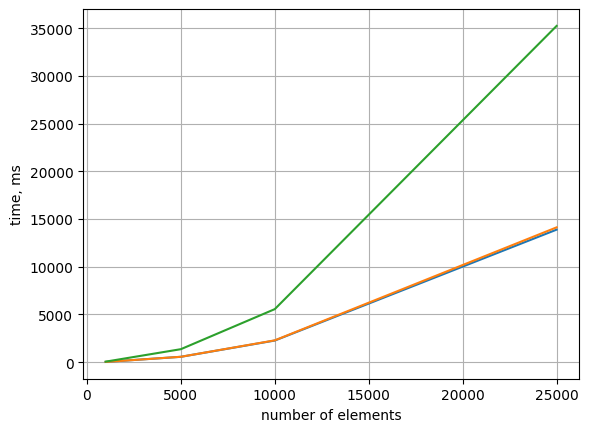

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(times_sort.keys(), times_sort.values(), times_reverse.keys(), times_reverse.values(), times_random.keys(), times_random.values())
plt.ylabel('time, ms')
plt.xlabel('number of elements')
plt.grid(True)
plt.show()

### Построение графиков зависимости времени выполнения от количества элементов для 2-го варианта блинной сортировки

Массивы из 1000 элементов
22.01 ms
20.98 ms
35.54 ms
Массивы из 5000 элементов
566.54 ms
560.12 ms
959.46 ms
Массивы из 10000 элементов
2252.28 ms
2250.12 ms
3866.05 ms
Массивы из 25000 элементов
14096.15 ms
14030.49 ms
24071.77 ms


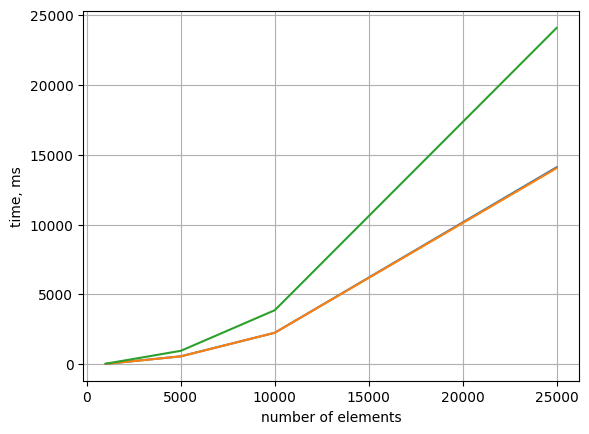

In [29]:
times_sort_1 = {}
times_reverse_1 = {}
times_random_1 = {}
print("Массивы из 1000 элементов")
n = 1000
start = time.time()

pancake_sort_1(list(get_sort_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_sort_1[n] = t
print(t, "ms")

n=1000
start = time.time()

pancake_sort_1(list(get_reverse_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_reverse_1[n] = t
print(t, "ms")

n = 1000
start = time.time()

pancake_sort_1(list(get_random_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_random_1[n] = t
print(t, "ms")

print("Массивы из 5000 элементов")
n = 5000
start = time.time()

pancake_sort_1(list(get_sort_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_sort_1[n] = t
print(t, "ms")

n = 5000
start = time.time()

pancake_sort_1(list(get_reverse_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_reverse_1[n] = t
print(t, "ms")

n = 5000
start = time.time()

pancake_sort_1(list(get_random_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_random_1[n] = t
print(t, "ms")

print("Массивы из 10000 элементов")
n = 10000
start = time.time()

pancake_sort_1(list(get_sort_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_sort_1[n] = t
print(t, "ms")

n = 10000
start = time.time()

pancake_sort_1(list(get_reverse_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_reverse_1[n] = t
print(t, "ms")

n = 10000
start = time.time()

pancake_sort_1(list(get_random_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_random_1[n] = t
print(t, "ms")

print("Массивы из 25000 элементов")
n = 25000
start = time.time()

pancake_sort_1(list(get_sort_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_sort_1[n] = t
print(t, "ms")

n = 25000
start = time.time()

pancake_sort_1(list(get_reverse_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_reverse_1[n] = t
print(t, "ms")

n = 25000
start = time.time()

pancake_sort_1(list(get_random_array(n)))

end = time.time()
t = round((end - start) * 10**3, 2)
times_random_1[n] = t
print(t, "ms")

#Графики зависимости
import matplotlib.pyplot as plt
import numpy as np
plt.plot(times_sort_1.keys(), times_sort_1.values(), times_reverse_1.keys(), times_reverse_1.values(), times_random_1.keys(), times_random_1.values())
plt.ylabel('time, ms')
plt.xlabel('number of elements')
plt.grid(True)
plt.show()

На основе полученных результатов, можно сделать вывод, что 2 вариант сортировки будет значительно быстрее для массива с случайно перемешанного массива